# Summary

The process of detecting CTSS shift within one cluster is the similar with the NPC dataset. 

Also first use scTSS and then use Brie2

Here, we select USPL1 as example to show the shift of CTSS.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle
import matplotlib.pyplot as plt

In [4]:
cellannotationdf=pd.read_csv('/storage3/yhhuang/users/ruiyan/development_data/anno_info/HTA08.v01.A05.Science_human_fig1.csv')
cellannotationdf

,index,Anno_level_1,Anno_level_2,Anno_level_3,Anno_level_4,Anno_level_5,Anno_level_fig1,Sample,donor,organ,sort,method,file,Anno_stage,Age,Gender,Source
0,FCAImmP7179369-AAACCTGAGCCCAATT,T,SP,T_naive,CD8+T,CD8+T,CD8+T,F21_TH_45P,F21,TH,45P,3GEX,FCAImmP7179369,CD8+T_middle,16w,Male,HDBR
1,FCAImmP7179369-AAACCTGAGCCTATGT,T,SP,T_naive,CD4+T,CD4+T,CD4+T,F21_TH_45P,F21,TH,45P,3GEX,FCAImmP7179369,CD4+T_middle,16w,Male,HDBR
2,FCAImmP7179369-AAACCTGAGTCGCCGT,T,DP,DP,DP,DP(P),DP,F21_TH_45P,F21,TH,45P,3GEX,FCAImmP7179369,DP_middle,16w,Male,HDBR
3,FCAImmP7179369-AAACCTGCAGCATGAG,T,SP,T_naive,CD8+T,CD8+T,CD8+T,F21_TH_45P,F21,TH,45P,3GEX,FCAImmP7179369,CD8+T_middle,16w,Male,HDBR
4,FCAImmP7179369-AAACCTGGTCTCCCTA,T,SP,CD8αα(I),CD8αα(I),CD8αα(I),CD8αα,F21_TH_45P,F21,TH,45P,3GEX,FCAImmP7179369,CD8αα_middle,16w,Male,HDBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255896,Human_colon_16S7985397-TTTGGTTCAAACCTAC,T,DP,DP,DP,DP(P),DP,F74_TH_TOT_5GEX_2,F74,TH,TOT,5GEX,Human_colon_16S7985397,DP_early,10w,Male,HDBR
255897,Human_colon_16S7985397-TTTGGTTCATGGTAGG,T,DP,DP,DP,DP(Q),DP,F74_TH_TOT_5GEX_2,F74,TH,TOT,5GEX,Human_colon_16S7985397,DP_early,10w,Male,HDBR
255898,Human_colon_16S7985397-TTTGGTTTCAAGGTAA,T,DP,DP,DP,DP(P),DP,F74_TH_TOT_5GEX_2,F74,TH,TOT,5GEX,Human_colon_16S7985397,DP_early,10w,Male,HDBR
255899,Human_colon_16S7985397-TTTGTCAAGCTGAACG,T,DP,DP,DP,DP(Q),DP,F74_TH_TOT_5GEX_2,F74,TH,TOT,5GEX,Human_colon_16S7985397,DP_early,10w,Male,HDBR


In [5]:
cellannotationdf.columns

selectdf=cellannotationdf[['index','Age','Sample','donor']]
selectdf

,index,Age,Sample,donor
0,FCAImmP7179369-AAACCTGAGCCCAATT,16w,F21_TH_45P,F21
1,FCAImmP7179369-AAACCTGAGCCTATGT,16w,F21_TH_45P,F21
2,FCAImmP7179369-AAACCTGAGTCGCCGT,16w,F21_TH_45P,F21
3,FCAImmP7179369-AAACCTGCAGCATGAG,16w,F21_TH_45P,F21
4,FCAImmP7179369-AAACCTGGTCTCCCTA,16w,F21_TH_45P,F21
...,...,...,...,...
255896,Human_colon_16S7985397-TTTGGTTCAAACCTAC,10w,F74_TH_TOT_5GEX_2,F74
255897,Human_colon_16S7985397-TTTGGTTCATGGTAGG,10w,F74_TH_TOT_5GEX_2,F74
255898,Human_colon_16S7985397-TTTGGTTTCAAGGTAA,10w,F74_TH_TOT_5GEX_2,F74
255899,Human_colon_16S7985397-TTTGTCAAGCTGAACG,10w,F74_TH_TOT_5GEX_2,F74


In [6]:
keepagedf=selectdf[(selectdf['Age']=='11w')|(selectdf['Age']=='12w')|(selectdf['Age']=='30m')]
keepagedf

,index,Age,Sample,donor
11618,FCAImmP7198634-AAACCTGTCAAACGGG,11w,F23_TH_45P,F23
11619,FCAImmP7198634-AAACGGGAGTTCGCAT,11w,F23_TH_45P,F23
11620,FCAImmP7198634-AAACGGGCATTTCACT,11w,F23_TH_45P,F23
11621,FCAImmP7198634-AAACGGGGTCACAAGG,11w,F23_TH_45P,F23
11622,FCAImmP7198634-AAACGGGTCACAACGT,11w,F23_TH_45P,F23
...,...,...,...,...
184279,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTAATAGCA,30m,T06_TH_TOT_5GEX_4,T06
184280,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTCTTCTCG,30m,T06_TH_TOT_5GEX_4,T06
184281,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTGCAACGA,30m,T06_TH_TOT_5GEX_4,T06
184282,T06_TH_TOT_5GEX_4_S12-TTTGTCATCGGAAATA,30m,T06_TH_TOT_5GEX_4,T06


In [7]:
keepagedf['prefix']=keepagedf['index'].str.split('-',expand=True)[0]
keepagedf

,index,Age,Sample,donor,prefix
11618,FCAImmP7198634-AAACCTGTCAAACGGG,11w,F23_TH_45P,F23,FCAImmP7198634
11619,FCAImmP7198634-AAACGGGAGTTCGCAT,11w,F23_TH_45P,F23,FCAImmP7198634
11620,FCAImmP7198634-AAACGGGCATTTCACT,11w,F23_TH_45P,F23,FCAImmP7198634
11621,FCAImmP7198634-AAACGGGGTCACAAGG,11w,F23_TH_45P,F23,FCAImmP7198634
11622,FCAImmP7198634-AAACGGGTCACAACGT,11w,F23_TH_45P,F23,FCAImmP7198634
...,...,...,...,...,...
184279,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTAATAGCA,30m,T06_TH_TOT_5GEX_4,T06,T06_TH_TOT_5GEX_4_S12
184280,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTCTTCTCG,30m,T06_TH_TOT_5GEX_4,T06,T06_TH_TOT_5GEX_4_S12
184281,T06_TH_TOT_5GEX_4_S12-TTTGTCAGTGCAACGA,30m,T06_TH_TOT_5GEX_4,T06,T06_TH_TOT_5GEX_4_S12
184282,T06_TH_TOT_5GEX_4_S12-TTTGTCATCGGAAATA,30m,T06_TH_TOT_5GEX_4,T06,T06_TH_TOT_5GEX_4_S12


In [8]:
keepagedf[keepagedf['Age']=='11w']['prefix'].unique()

array(['FCAImmP7198634', 'FCAImmP7198635', 'FCAImmP7851890',
       'FCAImmP7851891'], dtype=object)

In [9]:
keepagedf[keepagedf['Age']=='12w']['prefix'].unique()

array(['FCAImmP7579218', 'FCAImmP7579219', 'FCAImmP7579230',
       'FCAImmP7579231', 'FCAImmP7851892', 'FCAImmP7851893',
       'FCAImmP7851894', 'FCAImmP7851895'], dtype=object)

In [10]:
keepagedf[keepagedf['Age']=='30m']['prefix'].unique()

array(['T06_TH_TOT_5GEX_1_S9', 'T06_TH_TOT_5GEX_2_S10',
       'T06_TH_TOT_5GEX_3_S11', 'T06_TH_TOT_5GEX_4_S12'], dtype=object)

In [12]:
ctssadata=sc.read('/storage3/yhhuang/users/ruiyan/development_data/rerunscTSS/scTSS_out/alltimepoint_correct_strand/CTSS/all_ctss_two.h5ad')
ctssadata

AnnData object with n_obs × n_vars = 37559 × 8704
    var: 'gene_id', 'CTSS', 'counts_dropped_UnencodedG', 'fold_change', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [13]:
selectadata=ctssadata[:,ctssadata.var['gene_name']=='USPL1']
selectadata

View of AnnData object with n_obs × n_vars = 37559 × 3
    var: 'gene_id', 'CTSS', 'counts_dropped_UnencodedG', 'fold_change', 'Chromosome', 'Feature', 'Start', 'End', 'Strand', 'gene_name', 'len'

In [14]:
selectadata.var['gene_name']


clusterID
ENSG00000132952*30617773_30618040#30617862@780$13.016666666666667    USPL1
ENSG00000132952*30617773_30618040#30617919@912$9.009868421052632     USPL1
ENSG00000132952*30617773_30618040#30617953@260$7.616731517509728     USPL1
Name: gene_name, dtype: category
Categories (1, object): ['USPL1']

In [16]:
with open('/storage3/yhhuang/users/ruiyan/development_data/rerunscTSS/scTSS_out/alltimepoint_correct_strand/count/fetch_reads.pkl','rb') as f:
    fetchreads=pickle.load(f)

    

In [17]:
filterls=[]
for i in fetchreads['ENSG00000132952']:
    if ('14S' in i[2]) or ('15S' in i[2]) or ('16S' in i[2]):
        filterls.append(i)
        

In [18]:
w11=[]
for i in filterls:
    if ('FCAImmP7198634' in i[1]) or ('FCAImmP7579219' in i[1]) or('FCAImmP7851890' in i[1]) or ('FCAImmP7851891' in i[1]):
        w11.append(i)

        

In [19]:
len(w11)

w12=[]
for i in filterls:
    if ('FCAImmP7579218' in i[1]) or ('FCAImmP7198635' in i[1]) or('FCAImmP7579230' in i[1]) or ('FCAImmP7579231' in i[1]) or ('FCAImmP7851892' in i[1]) or ('FCAImmP7851893' in i[1]) or ('FCAImmP7851894' in i[1]) or ('FCAImmP7851895' in i[1]):
        w12.append(i)

        

In [20]:
len(w12)

m30=[]
for i in filterls:
    if ('T06_TH_TOT_5GEX_1_S9' in i[1]) or ('T06_TH_TOT_5GEX_2_S10' in i[1]) or('T06_TH_TOT_5GEX_3_S11' in i[1]) or ('T06_TH_TOT_5GEX_4_S12' in i[1]):
        m30.append(i)

        

In [21]:
len(m30)

1511

In [23]:
tobrieadata=sc.read('/storage3/yhhuang/users/ruiyan/development_data/CTSS_brie/express_to_brie_except_10m.h5ad')
tobrieadata

AnnData object with n_obs × n_vars = 35629 × 3332
    obs: 'index', 'cell_id', 'Anno_level_1', 'Anno_level_2', 'Anno_level_3', 'Anno_level_4', 'Anno_level_5', 'Anno_level_fig1', 'Sample', 'donor', 'organ', 'sort', 'file', 'Anno_stage', 'Age', 'Gender', 'Source'
    var: 'gene_ids', 'feature_types', 'gene_name', 'isoform1_name', 'isoform2_name'
    layers: 'ambiguous', 'isoform1', 'isoform2'

In [24]:
tobrieadata[:,tobrieadata.var['gene_name']=='USPL1'].var

,gene_ids,feature_types,gene_name,isoform1_name,isoform2_name
gene_ids,,,,,
ENSG00000132952,ENSG00000132952,Gene Expression,USPL1,ENSG00000132952*30617773_30618040#30617862@780...,ENSG00000132952*30617773_30618040#30617953@260...


In [26]:

## plot histogram

def plot_hist(start_site,end_site):
    w11tss=[]
    for i in w11:
        if (i[0]>start_site)&(i[0]<end_site):
            w11tss.append(i[0])
    fig, ax = plt.subplots()
    plt.hist(w11tss,bins=300,color='gold')
    plt.axvspan(30617862, 30617862, color='grey', alpha=0.2)
    plt.axvspan(30617953, 30617953, color='grey', alpha=0.2)
    plt.axvspan(30617919, 30617919, color='grey', alpha=0.2)
    #plt.title('USPL1 (11w)')
    #plt.xticks(rotation='45')
    #plt.xticks(np.arange(30617700,30618060,30))
    plt.xlim(xmin=30617760, xmax = 30618050)
    plt.ylim(ymin=0, ymax = 450)
    #plt.yticks(np.arange(0,450,50))
    plt.ylabel('filtered counts (week 11)')
    #fig.savefig('/storage/yhhuang/users/ruiyan/figure/figure6/example/track_fig/USPL1_w11.pdf',dpi=300,bbox_inches='tight')
    plt.show()
    
    
    w12tss=[]
    for i in w12:
        if (i[0]>start_site)&(i[0]<end_site):
            w12tss.append(i[0])

    fig, ax = plt.subplots()
    plt.hist(w12tss,bins=300,color='violet')
    plt.axvspan(30617862, 30617862, color='grey', alpha=0.2)
    plt.axvspan(30617953, 30617953, color='grey', alpha=0.2)
    plt.axvspan(30617919, 30617919, color='grey', alpha=0.2)
    #plt.title('USPL1 (12w)')
    #plt.xticks(rotation='45')
    #plt.xticks(np.arange(30617700,30618060,30))
    plt.xlim(xmin=30617760, xmax = 30618050)
    plt.ylim(ymin=0, ymax = 450)
    #plt.yticks(np.arange(0,450,50))
    plt.ylabel('filtered counts (week 12)')
    #fig.savefig('/storage/yhhuang/users/ruiyan/figure/figure6/example/track_fig/USPL1_w12.pdf',dpi=300,bbox_inches='tight')
    plt.show()
    
    
    m30tss=[]
    for i in m30:
        if (i[0]>start_site)&(i[0]<end_site):
            m30tss.append(i[0])

    fig, ax = plt.subplots()
    plt.hist(m30tss,bins=300,color='lightseagreen')
    plt.axvspan(30617862, 30617862, color='grey', alpha=0.2)
    plt.axvspan(30617953, 30617953, color='grey', alpha=0.2)
    plt.axvspan(30617919, 30617919, color='grey', alpha=0.2)
    #plt.title('USPL1 (30m)')
    #plt.xticks(rotation='45')
    #plt.xticks(np.arange(30617700,30618060,30))
    plt.xlim(xmin=30617760, xmax = 30618050)
    plt.ylim(ymin=0, ymax = 450)
    #plt.yticks(np.arange(0,450,50))
    plt.ylabel('filtered counts (month 30)')
    #fig.savefig('/storage/yhhuang/users/ruiyan/figure/figure6/example/track_fig/USPL1_m30.pdf',dpi=300,bbox_inches='tight')
    plt.show()
    
    

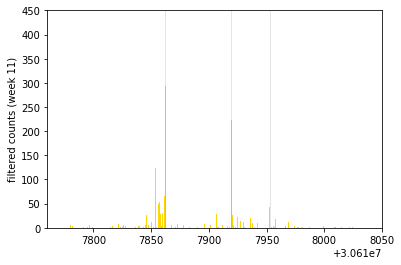

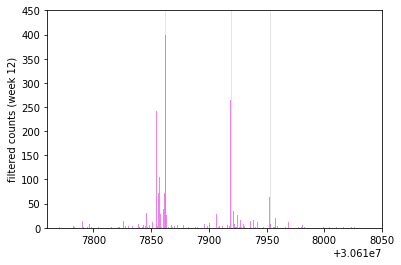

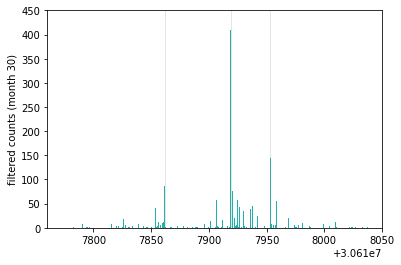

In [27]:
    
    
    
    
    
    
    
    

plot_hist(30617768,30618040)